# Project Name - Employee Absenteeism

# Data Exploration 

In [40]:
# IMPORTING ALL THE LIBRARY
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

In [21]:
#Importing the data

data = pd.read_excel('~/Data/Absenteeism_at_work.xls', sheet_name= 'Absenteeism_at_work' ,header=0,
                     na_values= ['',' ','NA','na','Na','N/A','N/a','n/a'])
####################################################################################################################
#Defining feature as categorical
Categorical_col = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker']
Non_Categorical_col = [i for i in data.columns if i not in Categorical_col]
for i in data.columns:
    if i in Categorical_col: data[i] = pd.Categorical(data[i])

data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


# Data Preprocessing

### Removing all the missing value of an data

In [22]:
# Self Defined function
####################################################################################################################
# Return the percentage of missing data in the original dataset
def PerOfMissing(d1,d2):# d1--data by droping the NAN value d2--Original data
    percent_of_missing_data = round( 100 - ((len(d1)/len(d2))*100), 2)
    percent_of_missing_data = str(percent_of_missing_data) + '% of data has Missing value'
    return percent_of_missing_data
####################################################################################################################
# Return MAE, MRSE, R², Adjusted R²
def reg_acc(y_true, y_pre):
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    print ("MSE of data: ", mean_squared_error(y_true,y_pre))
    print ("***RMSE of data: ", sqrt(mean_squared_error(y_true,y_pre)),'***')
    print ('Other Parameters:')
    print ("R² : ", r2_score(y_true,y_pre))
    print ('MAE:',mean_absolute_error(y_true,y_pre))

In [23]:
# droping all the NAN value from the data and saving the data in data_without_NAN
data_without_NAN = data.dropna()
print (PerOfMissing(data_without_NAN,data))

0.0% of data has Missing value


This shows data is clean with no missing values

In [24]:
data_without_NAN.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,1.018919,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,1.098489,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Observations :-
* The maximum value of Absenteeism time in hours  is 9 standard deviations away from the mean!
* The minimum values for Reason for absence and Month of absence are zero! These are considered unexpected values since 0 Month does not make sense.
* The ID column has 36 for the maximum value meaning that all these 740 observations are split amongst 36 workers. This means that all these rows are repeated observations over time among 36 people. 
A closer look of **the Absenteeism time in hours** and **Reason for absence** columns reveals that all 0's in both Absenteeism time in hours,Month of absence and Reason for absence columns correspond to Absenteeism time in hours=0.Doing so also takes out all the **Disciplinary failure==1** leaving us with only Disciplinary failure==0. This means that this feature is no longer needed for the analysis.

# Reason for absentieesm

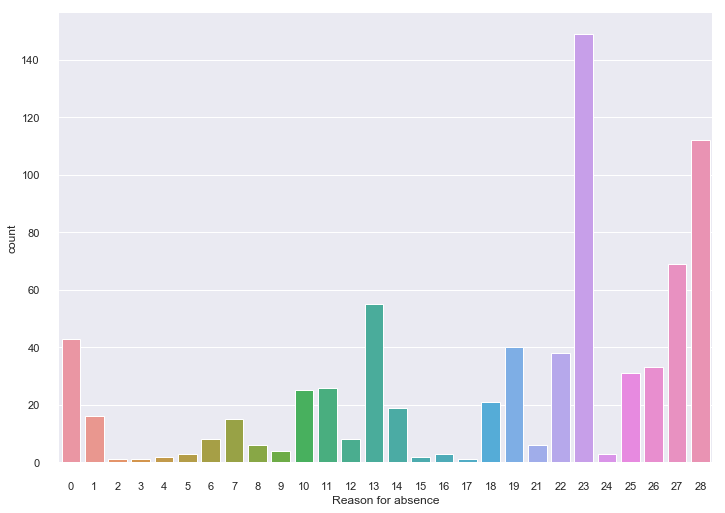

In [25]:
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Reason for absence' ,data=data)
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

Most Common(Top 5) reasons for absence:
23 : Medical Consultation
28 : Dental Consultation
27 : Physiotherapy
13 : Diseases of the musculoskeletal system and connective tissue
19 : Injury, poisoning and certain other consequences of external causes

### 1. Applying missing value analysis

#### Checking which missing value analysis is good for the data

In [29]:
#Creating list of columns name on basis of NAN value
col_with_nan, col_without_nan = [],[]
for i in data.columns:
    if data[i].isnull().sum() > 0:
        col_with_nan.append(i)
    else :col_without_nan.append(i)

#Creating the table which columns has how much missing value
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index': 'Variables', 0: 'Missing_Val'})
missing_val['Missing_per'] = round((missing_val['Missing_Val']/len(data))*100,2)
missing_val = missing_val.sort_values('Missing_per', ascending= False).reset_index(drop = True)
missing_val

,Variables,Missing_Val,Missing_per
0,ID,0,0.0
1,Disciplinary failure,0,0.0
2,Body mass index,0,0.0
3,Height,0,0.0
4,Weight,0,0.0
5,Pet,0,0.0
6,Social smoker,0,0.0
7,Social drinker,0,0.0
8,Son,0,0.0
9,Education,0,0.0


In [31]:
#random Number
index_NO_nan = data.dropna().index
random_index = []
for i in range(len(col_with_nan)):
    random_index.append(random.choice(index_NO_nan))
####################################################################################################################

#replacing data with nan
dum = data.copy()
for i in range(len(col_with_nan)):
    dum[col_with_nan[i]].loc[random_index[i]] = np.nan
####################################################################################################################

#created table
actV,meanV,medianV = [],[],[]
for i in range(len(col_with_nan)):
    actV.append(data[col_with_nan[i]].loc[random_index[i]])
        
for i in range(len(col_with_nan)):
    if col_with_nan[i] in Categorical_col:
        meanV.append(np.nan)#Categorical data has no mean(Error occur )
        medianV.append(np.nan)#Categorical data has no median
    else:
        meanV.append(data[col_with_nan[i]].mean())
        medianV.append(data[col_with_nan[i]].mean())

frame ={'Actual Value': actV,'Mean': meanV, 'Median': medianV}
data_frame = pd.DataFrame(data = frame, index = col_with_nan, dtype =int)

In [35]:
###########################"KNN with 3"###########################
data_KNN = KNN(k=3).complete(dum)
data_KNN = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))
    
data_frame['KNN_3'] = knn_array
print('##########################DONE##########################')
###########################"KNN with 5"###########################
data_KNN5 = KNN(k=5).complete(dum)
data_KNN5 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN5[col_with_nan[i]].loc[random_index[i]]))
    
data_frame['KNN_5'] = knn_array
print('##########################DONE##########################')
###########################"KNN with 7"###########################
data_KNN7 = KNN(k=7).complete(dum)
data_KNN7 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN7[col_with_nan[i]].loc[random_index[i]]))
    
data_frame['KNN_7'] = knn_array
print('##########################DONE##########################')


NameError: name 'KNN' is not defined

In [36]:
print("SAMPLE TESTED ARRAY IS", random_index)
data_frame

SAMPLE TESTED ARRAY IS []


,Actual Value,Mean,Median


#### KNN turn's out to produce good output relevent to the other missing value analysis

In [37]:
# Applying the KNN imputation over the data (k = 3)
process_data = KNN(k=3).complete(data)
process_data = pd.DataFrame(data = process_data, columns=data.columns)
##########################################################################################
# So, now on we will proccess further in KNN_pre_data
##########################################################################################
# converting all the non categorical value in integer

for i in process_data.columns:
    process_data[i]= process_data[i].astype('int')

for i in Categorical_col:
    process_data[i] = pd.Categorical(process_data[i])

NameError: name 'KNN' is not defined

### 2. Feature Selection

In [38]:
#Generating the correlation heatmap
plt.figure(figsize = (15, 10))
heat = sns.heatmap(process_data.drop(['ID'],axis=1).corr(), annot = True)
heat.figure.savefig('Heatmap.png')

NameError: name 'process_data' is not defined

<Figure size 1080x720 with 0 Axes>

In [12]:
# As per the heat map Weight is highly correlated with Body mass index. Moreover, weight divides with square of an height
#  is equal body mass index so weight and height column will be drop from the data set
process_data = process_data.drop(['Height','Weight'],axis=1)

### 3. Normalisation and Standardization

In [13]:
# All the numerical data will be scaled
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

In [41]:
for i in scaling_col:
    process_data[i]=(process_data[i]-min(process_data[i]))/(max(process_data[i])-min(process_data[i]))
    print(i,': Scaling Done')

NameError: name 'process_data' is not defined

In [15]:
# Saving of the processed data set
process_data.to_excel('Process data_new.xls', index = None)

In [44]:
# Spliting the data set in train-test
from sklearn.model_selection import train_test_split
Pro_X = process_data.drop(['Absenteeism time in hours'], axis=1)
Pro_Y = process_data['Absenteeism time in hours']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(Pro_X,Pro_Y, test_size=0.2)

NameError: name 'process_data' is not defined

In [43]:
# Applying KNN Machine learnig algorithm
from sklearn.neighbors import KNeighborsRegressor
Pro_KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_TRAIN,Y_TRAIN)
Final_KNN_predict = Pro_KNN_model.predict(X_TEST)
reg_acc(Y_TEST,Final_KNN_predict)

NameError: name 'X_TRAIN' is not defined

In [18]:
#Saving the train-test data into excel sheet
#write = pd.ExcelWriter('Train_Test_data.xlsx', engine='xlsxwriter')
#X_TRAIN.to_excel(write,sheet_name='TrainX',index=False)
#Y_TRAIN.to_excel(write,sheet_name='TrainY',index=False)
#X_TEST.to_excel(write,sheet_name='TestX',index=False)
#Y_TEST.to_excel(write,sheet_name='TestY',index=False)
#write.save()

## Other algorithm

In [42]:
#Applying linear regression machine learning algorithm
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(X_TRAIN,Y_TRAIN)
linear_predict = linReg.predict(X_TEST)
reg_acc(Y_TEST,linear_predict)
print('Intercept :',linReg.intercept_)
print('Coefficient')
for i,coef in zip(process_data.columns,linReg.coef_):
    print (i,"-->",coef)

NameError: name 'X_TRAIN' is not defined

In [20]:
#Applying all the different machine learning algorithm to check which produce the best result
#################################################################
from sklearn import tree
Deci_tree_pre = tree.DecisionTreeRegressor().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Decision Tree ML')
reg_acc(Deci_tree_pre,Y_TEST)
print('######END########')
#################################################################
from sklearn.ensemble import RandomForestRegressor
Ran_for_pre = RandomForestRegressor(n_estimators=50).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Random Forest ML')
reg_acc(Ran_for_pre,Y_TEST)
print('######END########')
#################################################################
from sklearn.naive_bayes import GaussianNB
print('Naive Bayes')
NB_pre = GaussianNB().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
reg_acc(NB_pre,Y_TEST)

Decision Tree ML
MSE of data:  345.61054804804803
***RMSE of data:  18.59060375695335 ***
Other Parameters:
R² :  -1.780393438617672
MAE: 7.15427927927928
######END########
Random Forest ML
MSE of data:  260.25189356272597
***RMSE of data:  16.13232449347353 ***
Other Parameters:
R² :  -4.7621185023122194
MAE: 6.671
######END########
Naive Bayes
MSE of data:  889.8108108108108
***RMSE of data:  29.829696793812886 ***
Other Parameters:
R² :  -0.6783951750053456
MAE: 18.93243243243243


## KNN Map

#### Measuring the number of 'k' suited with this Data set

In [49]:
list_mae,list_mse,list_r2,num=[],[],[],[]
for i in range(50):
    if i%2!=0:
        dummy_KNN = KNeighborsRegressor(n_neighbors=i).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
        num.append(i)
        list_mae.append(mean_absolute_error(dummy_KNN,Y_TEST))
        list_mse.append(mean_squared_error(dummy_KNN,Y_TEST))
        list_r2.append(r2_score(dummy_KNN,Y_TEST))

NameError: name 'X_TRAIN' is not defined

*********** M A E ***********
Kth Value: 27
Lowest MAE Value: 6.001001001001001


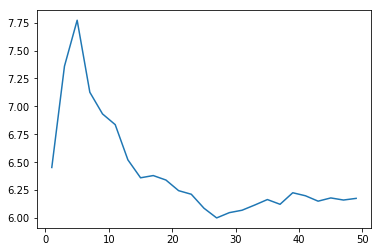

In [22]:
sns.lineplot(x=num,y=list_mae)
print('*********** M A E ***********')
print('Kth Value:',num[list_mae.index(min(list_mae))])
print('Lowest MAE Value:',min(list_mae))

In [48]:
sns.lineplot(x=num,y=list_mse)
print('*********** M S E ***********')
print('Kth Value:',num[list_mse.index(min(list_mse))])
print('Lowest MSE Value:',min(list_mse))

NameError: name 'num' is not defined

*********** R2 Value ***********
Kth Value 3
Lowest R2 Value: -3.325567767965528


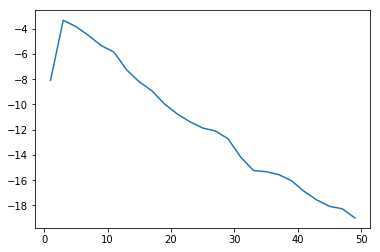

In [24]:
sns.lineplot(x=num,y=list_r2)
print('*********** R2 Value ***********')
print('Kth Value',num[list_r2.index(max(list_r2))])
print('Lowest R2 Value:',max(list_r2))

# Applying Multiple Models to compare performance

In [47]:
#### Model Applied by removing the missing value and preprocessing  the data
#data_without_NAN = data_without_NAN.drop(['Height','Weight'],axis=1)
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

for i in scaling_col:
    data_without_NAN[i]=(data_without_NAN[i]-min(data_without_NAN[i]))/(max(data_without_NAN[i])-min(data_without_NAN[i]))
    #print(i,': Scaling Done')

# Checking the outcome without preprocessing of the data set
#imputing the training and testing data with test_split
from sklearn.model_selection import train_test_split
X = data_without_NAN.drop(['Absenteeism time in hours'], axis=1)
Y = data_without_NAN['Absenteeism time in hours']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

print('#####____MODEL_CHECK____#########')

## KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=7).fit(x_train,y_train)
y_KNN_predict = KNN_model.predict(x_test)
#accuracy_KNN =  KNN_model.score(y_KNN_predict,y_test)
##print ("accuracy", accuracy_KNN*100)
print('KNN model')
reg_acc(y_KNN_predict,y_test)
print('###########')
print('###########')

# Decision Tree
from sklearn import tree
dec_model   = tree.DecisionTreeRegressor().fit(x_train,y_train)
y_dec_model = dec_model.predict(x_test)
#accuracy_c50 =  c50_model.score(x_test,y_test)
print('Decision Tree')
reg_acc(y_dec_model,y_test)
print('###########')
print('###########')

#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=20).fit(x_train,y_train)
y_rf_predict = RF_model.predict(x_test)
print('Random Forest')
reg_acc(y_rf_predict,y_test)
print('###########')
print('###########')

#Linear Reg
from sklearn.linear_model import LinearRegression
lReg = LinearRegression().fit(x_train,y_train)
l_predict = lReg.predict(x_test)
reg_acc(l_predict,y_test)
print('Linear Regression')
print('Intercept :',lReg.intercept_)
print('Coefficient')
for i,coef in zip(data_without_NAN.columns,lReg.coef_):
    print (i,"-->",coef)



#####____MODEL_CHECK____#########
KNN model
MSE of data:  137.0696359624931
***RMSE of data:  11.707674233702145 ***
Other Parameters:
R² :  -3.2825100321461242
MAE: 4.531853281853282
###########
###########
Decision Tree
MSE of data:  240.3581081081081
***RMSE of data:  15.503486966102436 ***
Other Parameters:
R² :  -0.8621636352768114
MAE: 5.02027027027027
###########
###########
Random Forest
MSE of data:  179.44078958362059
***RMSE of data:  13.395551111604949 ***
Other Parameters:
R² :  -1.4802358886431968
MAE: 5.281759169884171
###########
###########
MSE of data:  153.07342171430182
***RMSE of data:  12.372284417774344 ***
Other Parameters:
R² :  -4.931479012447751
MAE: 5.320268688756939
Linear Regression
Intercept : 74.65642496279655
Coefficient
ID --> -0.18655145234089798
Reason for absence --> -0.4942385444994273
Month of absence --> 0.0011334108492312596
Day of the week --> -0.8902330119088502
Seasons --> 0.10197941551518643
Transportation expense --> -0.6062303521736032
Dis

RMSE is minimum for KNN Model and Linear regression , thus we can use these models to predict absenteeism hours